# My Information
**Name:** Fiavor Isaac Sedem
**Index Number:** 11112276
**Class:** Computer Engineering

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('red_wine.csv')


In [5]:
print(df.head(10))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6        NaN   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [6]:
print(df.tail(20))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310         0.41             2.4      0.065   
1587            5.8             0.610         0.11             1.8      0.066   
1588            7.2             0.660         0.33             2.5      0.068   
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1595 non-null   float64
 5   free sulfur dioxide   1598 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1598.000000,1598.000000,1599.000000,1599.000000,1595.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1599.000000,1598.000000
mean,8.318335,0.527747,0.270976,2.538806,0.087476,15.867334,46.467792,0.996746,3.311113,0.658149,10.422983,5.635795
std,1.740863,0.179092,0.194801,1.409928,0.047117,10.459029,32.895324,0.001887,0.154386,0.169507,1.065668,0.807771
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


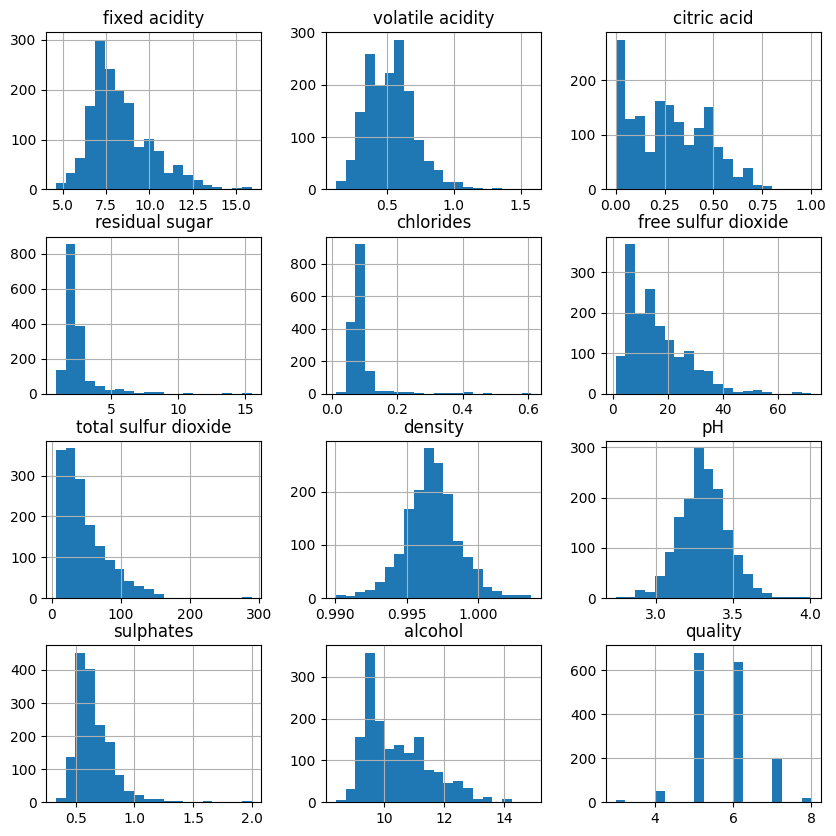

In [10]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [12]:
import seaborn as sns


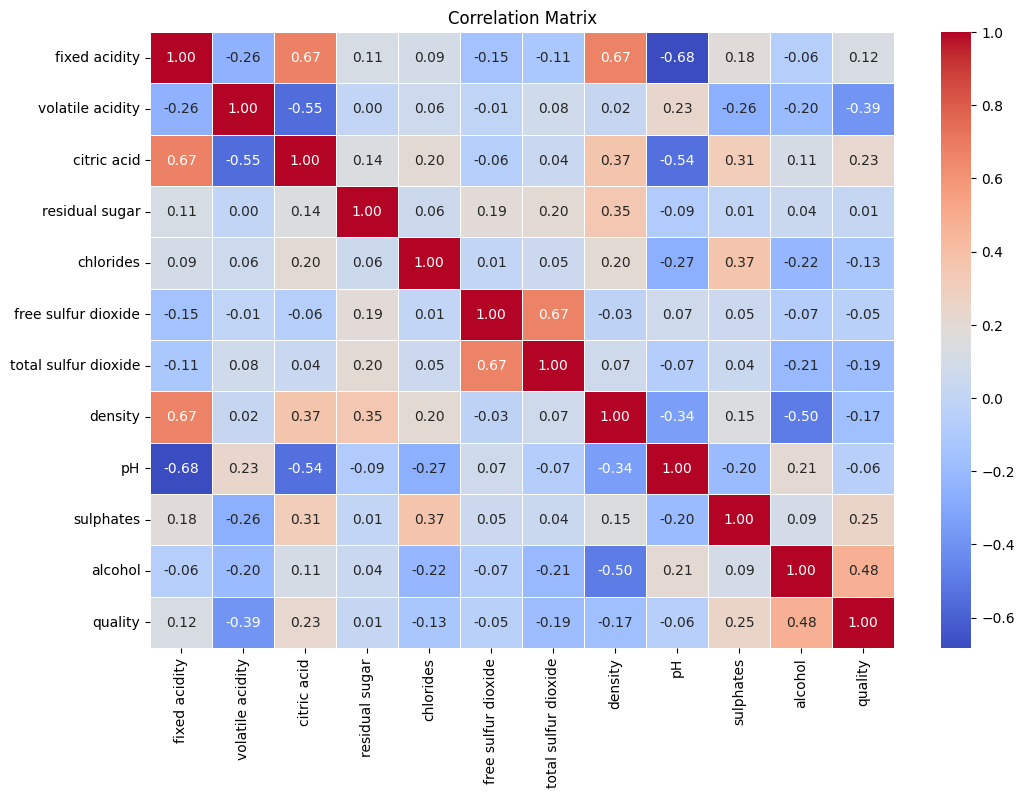

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

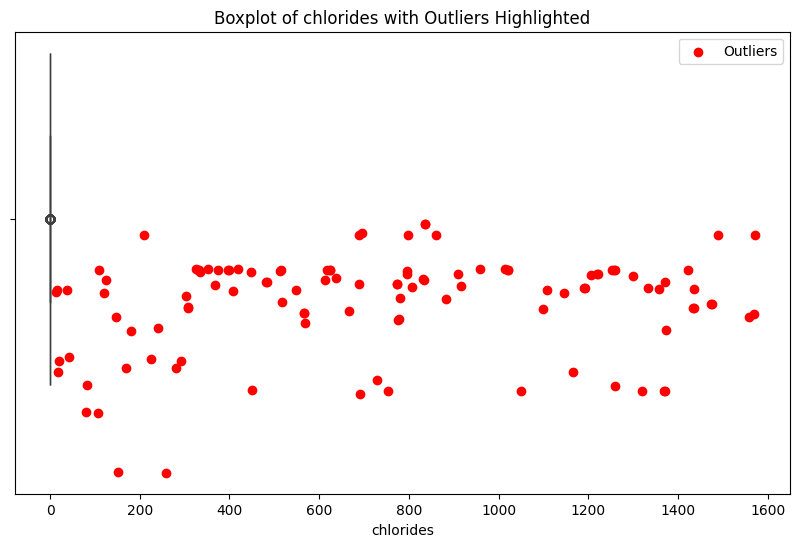

In [16]:
column_of_interest = 'chlorides'
Q1 = df[column_of_interest].quantile(0.25)
Q3 = df[column_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[column_of_interest] < lower_bound) | (df[column_of_interest] > upper_bound)]

# Visualize the distribution with outliers highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column_of_interest])
plt.title(f'Boxplot of {column_of_interest} with Outliers Highlighted')
plt.scatter(outliers.index, outliers[column_of_interest], color='red', label='Outliers')
plt.legend()
plt.show()

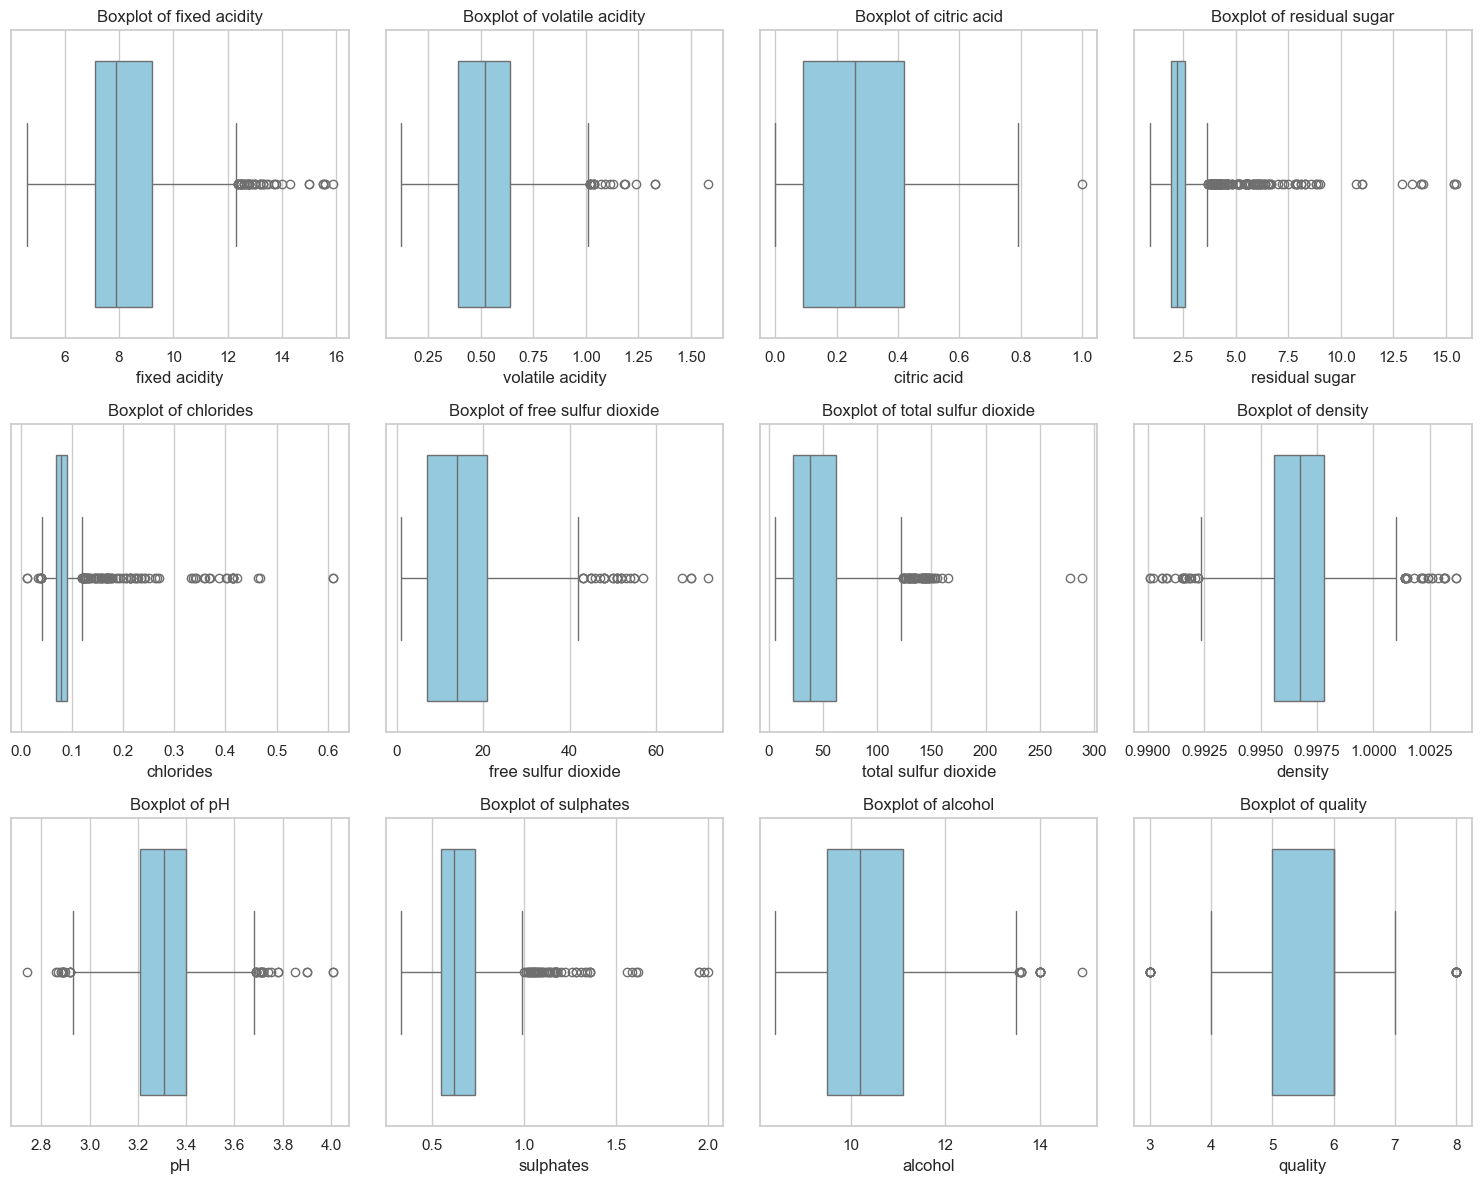

In [17]:
numerical_columns = df.select_dtypes(include='number').columns
num_cols = len(numerical_columns)
num_rows = (num_cols // 4) + (num_cols % 4 > 0) 
plt.figure(figsize=(15, 4 * num_rows))
sns.set(style="whitegrid") 
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Red Wine Dataset - Boxplot Analysis Report

## 1. Introduction
In this analysis, we explore the distribution and variability of each feature in the red wine dataset using boxplots.

## 2. Boxplots for Each Feature

### Feature 1: Fixed Acidity
![Fixed Acidity lot.png)
- The boxplot for fixed acidity provides insights into its distribution, central tendency, and potential outliers.

### Feature 2: Volatile Acidity
![Volatile Acot]boxplot.png)
- The boxplot for volatile acidity showcases the spread of values and highlights any extreme data points.

### Feature 3: Citric Acid
![Citrcid_boxplot.png)
- The boxplot for citric acid reveals information about its central tendency and variability.

### Feature 4: Residual Sugar
![Resl_sugar_boxplot.png)
- The boxplot for residual sugar provides insights into the distribution of this feature.

### Feature 5: Chloridr/chlorides_boxplot.png)
- The boxplot for chlorides helps understand its distribution, central tendency, and potential outliers.

### Feature 6: Free Sulfur Dioxide
![_sulfur_dioxide_boxplot.png)
- The boxplot for free sulfur dioxide showcases the spread of values and identifies any outliers.

### Feature 7: Total Sulfur Dioxideotal_sulfur_dioxide_boxplot.png)
- The boxplot for total sulfur dioxide reveals information about its distribution and central tendency.

### Fet](path/to/your/density_boxplot.png)
- The boxplot for density provides insights into its distribution and identifies any potential outlipH Boxplot](path/to/your/ph_boxplot.png)
- The boxplot for pH helps understand its central tendency and variability.

###Boxplot](path/to/your/sulphates_boxplot.png)
- The boxplot for sulphates provides insights into its distribution and identifies any extreme valuescohol Boxplot](path/to/your/alcohol_boxplot.png)
- The boxplot for alcohol content showcases the spreadin the distribution of features.

## 4. Interpretation

### Implications for Analysis
- The boxplots offer a visual understanding of the distribution of each feature, aiding in subsequent analyses and feature selection.

### Outliers
- Outliers may indicate potential anomalies in the dataset, and their impact on analyses should be considered.

## 5. Conclusion
The boxplot analysis provides valuable insights into the distribution and variability of each feature in the red wine dataset. Further exploration and analysis can be guided by these visualizations.

# Red Wine Dataset - Chlorides Boxplot Analysis Report

## 1. Introduction
In this analysis, we examine the distribution of the "Chlorides" feature in the red wine dataset using a boxplot.

## 2. Boxplot of Chlorides

### Boxplot
![Chlorides lot.png)
- The boxplot visualizes the distribution of chlorides in red wines, highlighting key statistics such as the median, quartiles, and potential outliers.

## 3. Key Observations

### Central Tendency
- **Median Chlorides Level:** The median chlorides level is represented by the horizontal line within the box. It indicates the central tendency of the data.

### Spread and Variability
- **Interquartile Range (IQR):** The box represents the IQR, showcasing the spread of chlorides values between the 25th and 75th percentiles.
- **Whiskers:** The whiskers extend to show the range of the data, excluding potential outliers.

### Outliers
- **Outliers:** Data points beyond the whiskers are considered potential outliers. The boxplot helps identify any extreme values in the chlorides distribution.

## 4. Interpretation

### Implications for Analysis
- Understanding the distribution of chlorides is essential for evaluating its impact on overall wine quality.
- Outliers may warrant further investigation to determine their influence on the dataset.

### Comparison with Domain Knowledge
- Compare the boxplot findings with existing knowledge about acceptable chlorides levels in red wines to assess the dataset's adherence to quality standards.

## 5. Conclusion
The chlorides boxplot analysis provides insights into the distribution and variability of chlorides levels in red wines. Further analysis and comparisons can help determine the significance of chloridesl sources were used in this analysis

# Red Wine Dataset - Histogram Analysis Report

## 1. Introduction
In this analysis, we explore the distributions of various features in the red wine dataset using histograms.

## 2. Histograms for Each Feature

### Feature 1: Fixed Acidity
![Fixed Acidity Histogram]
- The histogram for fixed acidity shows a roughly normal distribution with the majority of wines having fixed acidity values between 7 and 9.
- There is a small peak around 6, indicating a subgroup of wines with lower fixed acidity.

### Feature 2: Volatile Acidity
![Volatile Acidity Histogram]
- The histogram for volatile acidity indicates a right-skewed distribution, suggesting that most wines have lower volatile acidity.
- There is a long tail on the right, indicating a small percentage of wines with higher volatile acidity.

### Feature 3: Citric Acid
![Citric Acid Histogram]
- The histogram for citric acid reveals a bimodal distribution. There is a significant peak around 0.25, and a smaller peak around 0.5.
- This suggests the presence of two distinct subgroups of wines in terms of citric acid content.

### Feature 4: Residual Sugar
![Residual Sugar Histogram]
- The histogram for residual sugar shows a right-skewed distribution, with most wines having low residual sugar content.
- There is a noticeable peak around 2 grams per liter, indicating a subgroup of wines with slightly higher residual sugar.

### Feature 5: Chlorides
![Chlorides Histogram]
- The histogram for chlorides displays a right-skewed distribution, suggesting that the majority of wines have lower chloride content.
- There is a small peak around 0.08, indicating a subgroup of wines with slightly higher chloride levels.

### Feature 6: Free Sulfur Dioxide
![Free Sulfur Dioxide Histogram]
- The histogram for free sulfur dioxide indicates a right-skewed distribution, with most wines having lower free sulfur dioxide levels.
- There is a peak around 30, indicating a subgroup of wines with higher free sulfur dioxide.

### Feature 7: Total Sulfur Dioxide
![Total Sulfur Dioxide Histogram]
- The histogram for total sulfur dioxide shows a right-skewed distribution, suggesting that most wines have lower total sulfur dioxide levels.
- There is a peak around 120, indicating a subgroup of wines with higher total sulfur dioxide.

### Feature 8: Density
![Density Histogram]
- The histogram for density reveals a roughly normal distribution, centered around 0.996 g/cm³.

### Feature 9: pH
![pH Histogram]
- The histogram for pH shows a roughly normal distribution, with most wines having a pH value between 3.2 and 3.4.

### Feature 10: Sulphates
![Sulphates Histogram]
- The histogram for sulphates indicates a roughly normal distribution, with the majority of wines having sulphate levels between 0.6 and 0.8.

### Feature 11: Alcohol
![Alcohol Histogram]
- The histogram for alcohol content shows a right-skewed distribution, with most wines having alcohol content between 9% and 11%.
- There is a peak around 9%, indicating a subgroup of wines with lower alcohol content.

## 3. Summary and Insights
- The distributions of features vary widely, with some exhibiting normal distributions and others displaying skewed patterns.
- Features such as volatile acidity, residual sugar, and total sulfur dioxide show distinct subgroups within the dataset.
- Further analysis could explore correlations between these features and the overall quality of the red wines.

## 4. Recommendations
- Consider exploring the relationships between the identified subgroups and the wine quality ratings.
- Investigate if certain combinations of features contribute to higher or lower wine quality.

## 5. Conclusion
This histogram analysis provides valuable insights into the distributions of features in the red wine dataset. Understanding these distributions is crucial for subsequent analyses, allowing for a more informed exploration of potential patterns and correlations.

# Red Wine Dataset - Correlation Matrix Analysis Report

## 1. Introduction
In this analysis, we examine the correlation matrix of the red wine dataset to understand the relationships between different features.

## 2. Correlation Matrix

### Heatmap
![Correlation Matrix Heatmap]
- The heatmap visualizes the correlation coefficients between pairs of features in the red wine dataset.
- Positive values indicate a positive correlation, while negative values suggest a negative correlation.

## 3. Key Observations

### Strong Positive Correlations
- **Alcohol and Density:** There is a strong negative correlation between alcohol content and density. This suggests that wines with higher alcohol content tend to have lower density.

### Strong Negative Correlations
- **Volatile Acidity and Citric Acid:** There is a strong negative correlation between volatile acidity and citric acid. Wines with higher volatile acidity may have lower citric acid content.

### Weak Correlations
- **pH and Fixed Acidity:** The correlation between pH and fixed acidity appears to be weak. There is no significant trend indicating a strong relationship between these two features.

## 4. Interpretation

### Implications for Analysis
- Understanding these correlations is crucial for subsequent analyses, especially when considering feature selection or identifying potential influential factors.

### Areas for Further Investigation
- Investigate the impact of alcohol content and density on wine quality.
- Explore the relationship between volatile acidity, citric acid, and overall wine characteristics.

## 5. Conclusion
The correlation matrix analysis provides valuable insights into the relationships between different features in the red wine dataset. Further investigations into specific correlations can guide more focused analyses and potentially contribute to a deeper understanding of factors influencing wine quality.